In [1]:
from network_utils_hybrid import *
import random
import numpy as np
import time
import json
import matplotlib.pyplot as plt

In [18]:
num_ToR = 4
n = 4 # must be even, starts from 4
num_bsm_ir = 2
num_bsm_tel = 10
qs_per_node = 10

telecom_gen_rate = 1/(1e-2) # ebit average generation time in sec
switch_duration = 1e-3 # average switching delay in sec

specs = {
    "num_sw_ports": n,
    "num_ToR" : num_ToR,
    "qs_per_node" : qs_per_node,
    "bandwidth" : 2,
    "num_bsm_ir" : num_bsm_ir,
    "num_bsm_tel" : num_bsm_tel,
    "telecom_gen_rate" : telecom_gen_rate,
    "switch_duration" : switch_duration,
    "num_pd" : 1, # inactive
    "num_laser" : 1, # inactive
    "num_bs" : 1, # inactive
    "num_es" : 1 # inactive
}

JSON_PATH = "data/nir_latency.json"
with open(JSON_PATH) as f:
    time_nir = np.array(json.load(f))

telecom_gen_rate = 1/(1e-2) # ebit average generation time in sec
switch_duration = 1e-3 # average switching delay in sec
nir_prob = 1e-2 # NIR gen prob
qubit_reset = 1e-6 # qubit reset time in sec

G, vertex_list = clos_hybrid(specs)
edge_switches, node_list, node_qubit_list =  vertex_list
num_network_qubits = len(node_qubit_list)
print(num_network_qubits)
# num_qubits = 40



160


In [21]:
# req_rate_list = np.linspace(10,100,10)
req_rate_list = np.logspace(-1,1,10)
# req_rate_list= [0.1]
Nrep = 100

job_duration_list = []
job_wait_list = []

for i_req, req_rate in enumerate(req_rate_list):
    tic = time.time()
    total_time = Nrep/req_rate
    arrival_times = poisson_random_process(req_rate,total_time)
    start_finish_times, circ_depth_list  = clos_job_scheduler(specs, G, vertex_list, arrival_times)
    toc = time.time()
    print(f"{i_req+1}/{len(req_rate_list)} num jobs: {len(arrival_times)}, elapsed time: {toc-tic} sec")
    print(start_finish_times[:,1] - start_finish_times[:,0])
    job_duration_list.append( (start_finish_times[num_ToR:-1,1] - start_finish_times[num_ToR:-1,0]).mean())
    job_wait_list.append( (start_finish_times[num_ToR:-1,0] - arrival_times[num_ToR:-1]).mean())
    

1/10 num jobs: 106, elapsed time: 44.53037929534912 sec
[   1.84616667    1.79483333    2.10058333    2.24175       1.86716667
    1.99289286    1.99572619    1.87733333    1.81733333    1.8495
    1.874         1.8375        1.8755        1.73433333    2.22427381
    2.22594048    1.91516667    1.74016667    2.04345238    1.87861905
    1.878         1.85          1.85216667    1.8215        1.78716667
    2.10671429    2.31538095    1.803         1.76766667    1.77883333
    1.87283333    2.32589286    2.57805952    1.71383333    1.85033333
    1.76116667    1.87528571    1.78678571    2.38017857    2.42317857
    2.25320238    2.21203571    2.43716667    2.33983333    1.81383333
    1.81733333    1.8855        1.68033333    2.34220238    2.42886905
    1.91916667    2.26738095    2.35988095    1.79733333    1.77283333
    1.7945        1.83416667    1.79733333    1.72316667    1.75866667
    1.83583333    1.751         1.845         1.82433333    1.8695
    1.962         1.779      

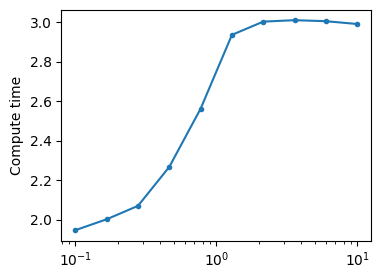

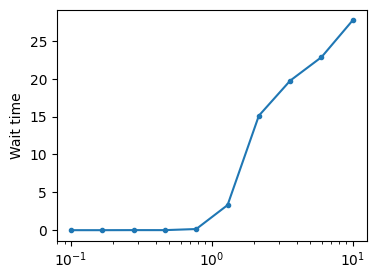

In [22]:
plt.figure(figsize=(4,3))
plt.plot(req_rate_list,job_duration_list,".-")
plt.ylabel("Compute time")
plt.xscale("log")
plt.show()

plt.figure(figsize=(4,3))
plt.plot(req_rate_list,job_wait_list,".-")
plt.ylabel("Wait time")
plt.xscale("log")
plt.show()


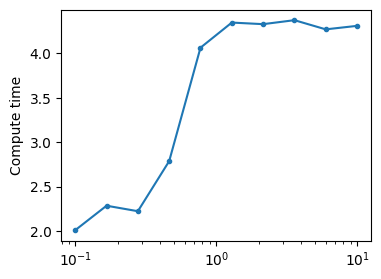

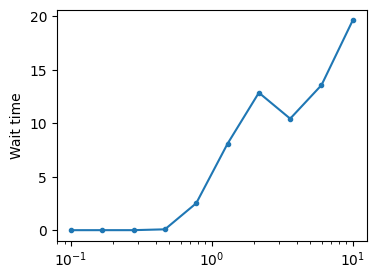

In [12]:
plt.figure(figsize=(4,3))
plt.plot(req_rate_list,job_duration_list,".-")
plt.ylabel("Compute time")
plt.xscale("log")
plt.show()

plt.figure(figsize=(4,3))
plt.plot(req_rate_list,job_wait_list,".-")
plt.ylabel("Wait time")
plt.xscale("log")
plt.show()



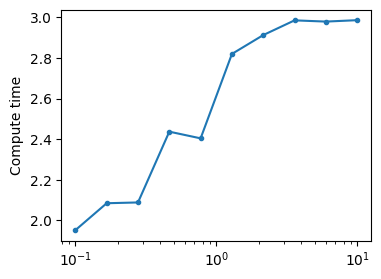

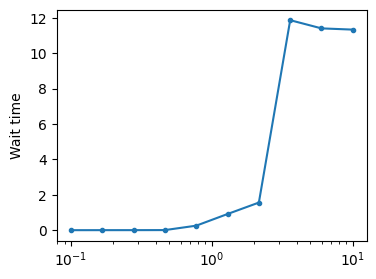

In [20]:
plt.figure(figsize=(4,3))
plt.plot(req_rate_list,job_duration_list,".-")
plt.ylabel("Compute time")
plt.xscale("log")
plt.show()

plt.figure(figsize=(4,3))
plt.plot(req_rate_list,job_wait_list,".-")
plt.ylabel("Wait time")
plt.xscale("log")
plt.show()

In [7]:
print(start_finish_times[:,1]-start_finish_times[:,0])
print(start_finish_times[:,0]-arrival_times)
print(circ_depth_list)

[4.05136905 4.53675    4.31132143 4.53675    4.28314286 3.97317857
 4.93125    4.25496429 3.86046429 4.56492857 4.56492857 3.91682143
 4.00135714 4.56492857 4.45221429 4.734      4.08589286 4.42403571
 4.48039286 4.3395     3.97317857 4.25496429 4.3395     4.50857143
 3.97317857 4.11407143 3.945      4.79035714 4.3395     4.25496429
 4.22678571 3.88864286 4.93125    4.02953571 4.70582143 4.84671429
 4.25496429 3.91682143 4.31132143 4.64946429 4.28314286 4.79035714
 4.39585714 4.25496429 3.80410714 3.91682143 4.56492857 4.81853571
 4.64946429 4.02953571 4.17042857 4.87489286 4.19860714 4.53675
 4.08589286 4.28314286 4.3395     3.97317857 4.81853571 4.39585714
 4.48039286 4.42403571 4.22678571 3.49414286 4.67764286 4.70582143
 3.83228571 4.28314286 4.31132143 4.45221429 4.95942857 4.19860714
 4.50857143 3.88864286 4.53675    4.19860714 4.11407143 3.97317857
 4.22678571 4.31132143 3.945      5.04396429 4.22678571 4.17042857
 4.25496429 4.17042857 4.81853571 4.64946429 4.45221429 3.8604642

# Development edition

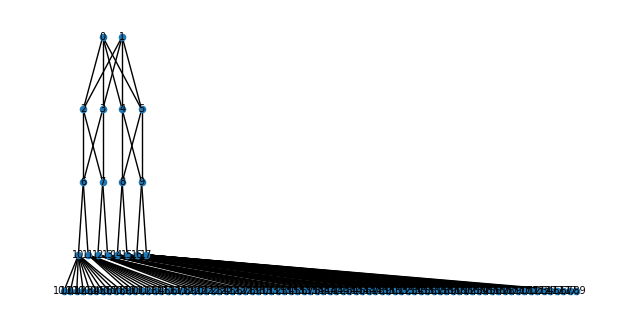

In [30]:
n = 4 # starts from 4
bandwidth = 2
num_ToR = 2
qs_per_node = 10
num_core = n // 2
num_agg = n
num_edge = n**2 // 4
num_nodes = num_edge * num_ToR # number of q nodes
# num_bsms = num_leaves # number of BSMs

# num_bsm = 1
num_bsm_agg = 2
num_bsm_edge = 2
num_pd = 1
num_laser = 1
num_bs = 1
num_es = 1

num_vertices = num_core + num_agg + num_edge + num_nodes
core_bw = 4*bandwidth
agg_bw = 2*bandwidth
edge_bw = bandwidth

G = nx.Graph()
## adding node attributes
# "PD", "BSM", "Laser", "BS", "ES"
attrs = {}

core_switches = range(num_core)
G.add_nodes_from(core_switches, type='core')
for core in core_switches:
    attrs[core] = {"PD": 0, "BSM_ir":0, "BSM_tel":0, "Laser":0, "BS":0, "ES":0}
agg_switches = range(num_core,num_core+num_agg)
G.add_nodes_from(agg_switches, type='agg')
for agg in agg_switches:
    attrs[agg] = {"PD": 0, "BSM_ir":0, "BSM_tel":num_bsm_agg, "Laser":0, "BS":0, "ES":0}
edge_switches = range(num_core+num_agg,num_core + num_agg + num_edge)
G.add_nodes_from(edge_switches, type='edge')
for edge in edge_switches:
    attrs[edge] = {"PD": num_pd, "BSM_ir": num_bsm_edge, "BSM_tel":0, "Laser": num_laser, "BS": num_bs, "ES": num_es}
node_list = range(num_core + num_agg + num_edge,num_vertices)
G.add_nodes_from(node_list, type='node')
node_qubit_list = []
for node in node_list:
    for qubit in range(qs_per_node):
        qname = f"{node},{qubit}"
        node_qubit_list.append(qname)
        G.add_edge(node,qname, weight=1)
        
nx.set_node_attributes(G, attrs)

# G.add_nodes_from(node_qubit_list, type='qubit')

for core in core_switches:
    for agg in agg_switches:
        G.add_edge(core,agg, weight=core_bw)

new_edges = []
extra_edges = []
agg_conn = np.ones(num_agg)* (n//2)
for i, edge in enumerate(edge_switches):
    i1 = np.argwhere(agg_conn>0)[0,0]
    G.add_edge(edge,agg_switches[i1], weight=agg_bw)
    agg_conn[i1] -= 1 
    G.add_edge(edge,agg_switches[i1+1], weight=agg_bw)
    agg_conn[i1+1] -= 1 

for i, edge in enumerate(edge_switches):
    for j in range(num_ToR):
        G.add_edge(edge,node_list[num_ToR*i+j], weight=edge_bw)

shift = 3
pos_core = {i: (shift+i+ n/4 ,2) for i in core_switches}
pos_agg = {i: (shift+(i-n//2)% n,1) for i in agg_switches}
pos_edge = {i: (shift+i-7*n/4+1,0) for i in edge_switches}
pos_nodes = {node: (shift+i/2-1/4,-1) for i, node in enumerate(node_list)}
# pos_qs = {q: (i-2,-1.5-(i%4)/4) for i, q in enumerate(node_qubit_list)}
pos_qs = {q: (i/3+2,-1.5) for i, q in enumerate(node_qubit_list)}
# pos_core = {i: (8*shift+16*i ,2) for i in core_switches}
# pos_agg = {i: (8*shift+16*(((i-n//2)% n)-1),1) for i in agg_switches}
# pos_edge = {i: (0*shift+16*(i-1.2*n),0) for i in edge_switches}
# pos_nodes = {node: (shift+8*i-n,-1) for i, node in enumerate(node_list)}
# pos_qs = {q: (2*i-2,-1.5-(i%4)/4) for i, q in enumerate(node_qubit_list)}
pos = pos_core | pos_agg | pos_edge | pos_nodes | pos_qs


fig, ax = plt.subplots(figsize=(8,4))

nx.draw(G, pos, node_size=20, font_size=7, with_labels=True)
plt.show()

In [31]:
def poisson_random_process(lmbda, total_time):
    """
    Generate a Poisson random process.
    
    Parameters:
        lmbda (float): The parameter lambda of the Poisson distribution.
        total_time (float): The total time for the process.
    
    Returns:
        numpy.ndarray: An array of timestamps when events occur.
    """
    num_events = np.random.poisson(lmbda * total_time)
    event_times = np.cumsum(np.random.exponential(1 / lmbda, num_events))
    event_times = event_times[event_times < total_time]
    return event_times-event_times[0]

def construct_dag(node_qubit_list, q_assignment, num_gates):
    node_qubit_names = [node_qubit_list[q] for q in q_assignment]
    # print(node_qubit_names)
    qubit_nx_to_qiskit = {qubit: idx for idx, qubit in enumerate(node_qubit_names)}
    num_qubits = len(q_assignment)
    connections = []
    for i in range(num_qubits):
        for j in range(i+1,num_qubits):
            if np.random.rand() > 0.5:
                connections.append((node_qubit_names[i],node_qubit_names[j]))
            else:
                connections.append((node_qubit_names[j],node_qubit_names[i]))

    gate_seq = random.choices(connections, k=num_gates)
    qiskit_q_list = QuantumRegister(num_qubits, "q")
    circ = QuantumCircuit(qiskit_q_list)
    for g in gate_seq:
        q1 = qubit_nx_to_qiskit[g[0]]
        q2 = qubit_nx_to_qiskit[g[1]]
        circ.cx(q1,q2)
    dag = circuit_to_dag(circ)
    circ_depth = dag.depth()
    dag_qubit_map = {bit: index for index, bit in enumerate(dag.qubits)}
    # print(gate_seq)
    # print(circ)
    return dag, circ_depth, dag_qubit_map

In [57]:
# def eff_network_latency_multidag_hybrid(G, vertex_list, gate_seq_inputs):
telecom_gen_rate = 1/(1e-2) # ebit average generation time in sec
switch_duration = 1e-3 # average switching delay in sec

req_rate = 2
total_time = 20
job_time = 40
arrival_times = poisson_random_process(req_rate,total_time)
print(arrival_times)
# arrival_times = np.array([0.0])
num_jobs = len(arrival_times)
start_finish_times = np.zeros((num_jobs,3))
start_finish_times[:,1] = -1
print(f"No. of jobs: {num_jobs}")

avail_qpus = list(range(num_ToR))
switch_events = np.arange(0,total_time,10)
arrival_times_iter = arrival_times.copy()

dags_list = []
circ_depth_list = []
dags_qubit_map = []
compute_qs_list = []

remain_gates = np.array([])
tic = 0.0
# switch_seq = []
# while len(dag.gate_nodes())>0:
# while tic < total_time:
while len(dags_list)< num_jobs or remain_gates.sum()>0:
    # print(f"time: {tic}")
    # running_idx = np.argwhere(start_finish_times[:,1]==0)
    # if len(running_idx)>0:
        # running_idx = running_idx[:,0]
    # if len(dags_list) > 0:
    #     remain_gates = np.array([len(dag.gate_nodes()) for dag in dags_list])
    #     # print(tic, "remaining gates: ", remain_gates)
    #     done_jobs = np.argwhere(remain_gates==0)
    #     # done_jobs = np.argwhere(tic-start_finish_times[running_idx,0] > job_time)
    #     if len(done_jobs)>0:
    #         done_jobs = done_jobs[:,0]
    #         # start_finish_times[running_idx[done_jobs],1] = tic
    #         # avail_qpus += start_finish_times[running_idx[done_jobs],2].astype(int).tolist()
    #         # print(start_finish_times)
    #         for i_jobs in done_jobs:
    #             if start_finish_times[i_jobs,1] == 0:
    #                 print(f"{i_jobs} is done at {tic}")
    #                 start_finish_times[i_jobs,1] = tic
    #                 avail_qpus += [int(start_finish_times[i_jobs,2])]

    idx_to_exec = np.argwhere(arrival_times_iter<=tic)
    if len(idx_to_exec)>0:
        print(f"time: {tic}")
        print("avail qpus:", avail_qpus)
        idx_to_exec = idx_to_exec[:,0]
        print("reqs:", arrival_times_iter[idx_to_exec])
        counter = 0
        idx_exec = []
        while len(avail_qpus)>0 and counter<len(idx_to_exec):
            idx_exec.append(idx_to_exec[counter])
            start_finish_times[num_jobs-len(arrival_times_iter)+counter,0] = tic
            start_finish_times[num_jobs-len(arrival_times_iter)+counter,1] = 0
            start_finish_times[num_jobs-len(arrival_times_iter)+counter,2] = avail_qpus[0]
            compute_qs = [qs_per_node*num_ToR*j + i + qs_per_node*avail_qpus[0]  for j in range(n**2//4) for i in range(qs_per_node)]
            num_gates = 10*len(compute_qs)
            dag, circ_depth, dag_qubit_map = construct_dag(node_qubit_list, compute_qs, num_gates)
            # print(dag_qubit_map)
            dags_list.append(dag)
            compute_qs_list.append(compute_qs)
            circ_depth_list.append(circ_depth)
            dags_qubit_map.append(dag_qubit_map) # don't forget to remove it.
            avail_qpus.remove(avail_qpus[0])
            counter += 1
        print("executed:", arrival_times_iter[idx_exec])
        arrival_times_iter = np.delete(arrival_times_iter, idx_exec)

    # if sum([len(dag.gate_nodes()) for dag in dags_list])==0:
    #     break
    num_active_jobs = len(dags_list)
    G_ins =  G.copy()
    num_ir_swap = 0
    num_tel_swap = 0
    execute = True
    while execute:
        execute = False

        indep_gate_seq_list = []
        dag_node_seq_list = []
        for i_dag, dag in enumerate(dags_list):
            dag_qubit_map = dags_qubit_map[i_dag]
            compute_qs = compute_qs_list[i_dag]
            indep_gate_seq = []
            dag_node_seq = []
            num_decendants = []
            for node in dag.front_layer():
                if node.op.num_qubits< 2:
                    dag.remove_op_node(node)
                if node.op.num_qubits>= 2:
                    indep_gate_seq.append((node_qubit_list[compute_qs[dag_qubit_map[node.qargs[0]]]],node_qubit_list[compute_qs[dag_qubit_map[node.qargs[1]]]]))
                    dag_node_seq.append(node)
                    num_decendants.append(len([g for g in dag.bfs_successors(node)])-1)

            sorted_idx = sorted(range(len(num_decendants)), key=lambda k: num_decendants[k], reverse=True)
            # sorted_idx = sorted(range(len(num_decendants)), key=lambda x: random.random())
            dag_node_seq = [dag_node_seq[k] for k in sorted_idx]
            indep_gate_seq = [indep_gate_seq[k] for k in sorted_idx]
            indep_gate_seq_list.append(indep_gate_seq)
            dag_node_seq_list.append(dag_node_seq)

        rand_idx = sorted(range(num_active_jobs), key=lambda x: random.random())
        for i_job in rand_idx:
            # dag = dags_list[i_job]
            # dag_node_seq = dag_node_seq_list[i_job]
            indep_gate_seq = indep_gate_seq_list[i_job]
            for i_g, g in enumerate(indep_gate_seq):
                # print(g)
                n0 = g[0]
                n1 = g[1]
                if nx.has_path(G_ins,n0,n1):
                    paths = nx.all_shortest_paths(G_ins, n0, n1, weight=None)
                    for shortestpath in paths:
                        if len(shortestpath)<= 3 :
                            dags_list[i_job].remove_op_node(dag_node_seq_list[i_job][i_g])
                            break
                        elif len(shortestpath)> 5 :
                            tel_ir = "tel"
                        else:
                            tel_ir = "ir"

                        sp = []
                        b = []
                        # for i in range(0,len(shortestpath)-1):
                        for i in range(1,len(shortestpath)-2):
                            sp.append((shortestpath[i],shortestpath[i+1]))
                            if 1 < i < len(shortestpath)-2:
                                sw = shortestpath[i]
                                if G_ins.nodes[sw]["BSM_"+tel_ir] > 0:
                                    b.append(sw)
                        
                        if len(b)>=1:
                            sw_bsm = random.sample(b,1)[0]
                            G_ins.nodes[sw_bsm]["BSM_"+tel_ir]-= 1
                            for u, v in sp:
                                if G_ins[u][v]['weight'] == 1:
                                    G_ins.remove_edge(u, v)
                                else:
                                    G_ins[u][v]['weight'] -= 1
                            if  tel_ir == "tel":
                                num_tel_swap += 1
                            else:
                                num_ir_swap += 1
                            
                            dags_list[i_job].remove_op_node(dag_node_seq_list[i_job][i_g])
                            execute = True
                            # print(g, "gate exec", num_tel_swap)
                            break
    # tic += 1/telecom_gen_rate * time_spdc([num_tel_swap])[0] + switch_duration * ( num_tel_swap > 0 )
    dt = 1/telecom_gen_rate * time_spdc([num_tel_swap])[0] + switch_duration * ( num_tel_swap > 0 )
    if dt > 0:
        tic += dt
    else:
        if len(arrival_times_iter)>0:
            tic = arrival_times_iter[0]
        #     continue
        #     # start_finish_times = start_finish_times[:-1,:]
        #     # circ_depth_list = np.array(circ_depth_list)[:-1]
        #     break
    # switch_seq.append([num_ir_swap, num_tel_swap])
    if len(dags_list) > 0:
        remain_gates = np.array([len(dag.gate_nodes()) for dag in dags_list])
        # print(tic, "remaining gates: ", remain_gates)
        done_jobs = np.argwhere(remain_gates==0)
        # done_jobs = np.argwhere(tic-start_finish_times[running_idx,0] > job_time)
        if len(done_jobs)>0:
            done_jobs = done_jobs[:,0]
            # start_finish_times[running_idx[done_jobs],1] = tic
            # avail_qpus += start_finish_times[running_idx[done_jobs],2].astype(int).tolist()
            # print(start_finish_times)
            for i_jobs in done_jobs:
                if start_finish_times[i_jobs,1] == 0:
                    print(f"{i_jobs} is done at {tic}")
                    start_finish_times[i_jobs,1] = tic
                    avail_qpus += [int(start_finish_times[i_jobs,2])]

remain_gates

[ 0.          0.79106151  0.85326062  1.47784037  2.62104418  3.20979958
  3.37447154  3.83855781  4.34969848  4.6600188   5.55013452  7.40134778
  7.49003197  7.88547211  8.59942284  8.68509458  8.79610683  8.92957248
  9.98139928 10.60297387 10.80982044 11.32662606 11.69038432 11.81181512
 12.15515274 13.2609525  13.82475104 13.83829028 15.49503229 16.01934757
 16.61778623 16.6191438  17.18024544 17.53186945 17.68205403 17.68561309
 17.86401923 18.25578958 18.85958424 19.59155226]
No. of jobs: 40
time: 0.0
avail qpus: [0, 1]
reqs: [0.]
executed: [0.]
time: 0.8025
avail qpus: [1]
reqs: [0.79106151]
executed: [0.79106151]
time: 0.8563571428571428
avail qpus: []
reqs: [0.85326062]
executed: []
time: 0.8845357142857142
avail qpus: []
reqs: [0.85326062]
executed: []
time: 0.9100357142857142
avail qpus: []
reqs: [0.85326062]
executed: []
time: 0.9369642857142856
avail qpus: []
reqs: [0.85326062]
executed: []
time: 0.9624642857142856
avail qpus: []
reqs: [0.85326062]
executed: []
time: 0.98

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [58]:
print(start_finish_times[:,1]-start_finish_times[:,0])
print(start_finish_times[:,0]-arrival_times)

[2.17614286 2.6444881  2.44375    2.34439286 2.38764286 2.28675
 2.49580952 2.44570238 2.35792857 2.38760714 2.42922619 2.32541667
 2.49975    2.3560119  2.34280952 2.51603571 2.42953571 2.57971429
 2.27157143 2.37378571 2.31209524 2.53066667 2.50627381 2.51379762
 2.66608333 2.37113095 2.55602381 2.37883333 2.45036905 2.45759524
 2.56855952 2.38080952 2.25440476 2.29564286 2.42305952 2.37188095
 2.46920238 2.40496429 2.48989286 2.14557143]
[0.00000000e+00 1.14384937e-02 1.32288223e+00 1.96914772e+00
 1.99884868e+00 2.58158137e+00 3.63306417e+00 4.23957314e+00
 5.15364676e+00 5.86381453e+00 6.31113929e+00 5.51009270e+00
 6.80046803e+00 7.35138503e+00 8.19082716e+00 8.90777447e+00
 1.03369527e+01 1.11793323e+01 1.15811960e+01 1.20856452e+01
 1.30243462e+01 1.37357787e+01 1.44558776e+01 1.57812563e+01
 1.64973830e+01 1.68459165e+01 1.74938680e+01 1.86397097e+01
 1.83796106e+01 1.88374858e+01 1.97072257e+01 2.06952848e+01
 2.17133260e+01 2.21633686e+01 2.34659222e+01 2.43052679e+01
 2.570

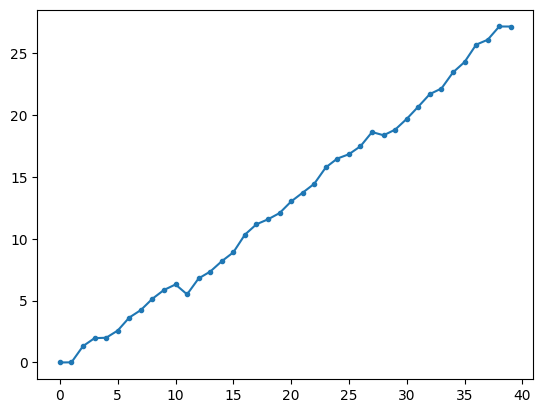

In [59]:
plt.plot(start_finish_times[:,0]-arrival_times,".-")

In [74]:

num_net_nodes = len(node_list)
num_net_edge = len(edge_switches)
num_net_qubits = len(node_qubit_list)

req_rate = 0.1
total_time = 101
job_time = 11
arrival_times = poisson_random_process(req_rate,total_time)
print(arrival_times)
num_jobs = len(arrival_times)
start_finish_times = np.zeros((num_jobs,3))
start_finish_times[:,1] = -1
print(f"No. of jobs: {num_jobs}")

avail_qpus = list(range(num_ToR))
switch_events = np.arange(0,total_time,10)
arrival_times_iter = arrival_times.copy()
for tic in switch_events:
    print(f"time: {tic}")
    running_idx = np.argwhere(start_finish_times[:,1]==0)
    if len(running_idx)>0:
        running_idx = running_idx[:,0]
        done_jobs = np.argwhere(tic-start_finish_times[running_idx,0] > job_time)
        if len(done_jobs)>0:
            done_jobs = done_jobs[:,0]
            start_finish_times[running_idx[done_jobs],1] = tic
            avail_qpus += start_finish_times[running_idx[done_jobs],2].astype(int).tolist()

    idx_to_exec = np.argwhere(arrival_times_iter<=tic)
    if len(idx_to_exec)>0:
        print("avail qpus:", avail_qpus)
        idx_to_exec = idx_to_exec[:,0]
        print("reqs:", arrival_times_iter[idx_to_exec])
        counter = 0
        idx_exec = []
        while len(avail_qpus)>0 and counter<len(idx_to_exec):
            idx_exec.append(idx_to_exec[counter])
            start_finish_times[num_jobs-len(arrival_times_iter)+counter,0] = tic
            start_finish_times[num_jobs-len(arrival_times_iter)+counter,1] = 0
            start_finish_times[num_jobs-len(arrival_times_iter)+counter,2] = avail_qpus[0]
            compute_q_list = [qs_per_node*num_ToR*j + i + qs_per_node*avail_qpus[0]  for j in range(n**2//4) for i in range(qs_per_node)]
            num_gates = len(compute_q_list)
            dag, circ_depth, dag_qubit_map = construct_dag(compute_q_list, num_gates)
            dags_list.append(dag)
            circ_depth_list.append(circ_depth)
            dags_qubit_map.append(dag_qubit_map) # don't forget to remove it.
            avail_qpus.remove(avail_qpus[0])
            counter += 1
        print("executed:", arrival_times_iter[idx_exec])
        arrival_times_iter = np.delete(arrival_times_iter, idx_exec)

print("sf times", start_finish_times)
print("circ depths", circ_depth_list)
    # arrival_times_iter[]  
# num_gates = 4
# # print(compute_q_list)
# compute_q_list = []
# for job_num in range(num_ToR):
# # for job_num in range(1):
#     compute_q_list.append([qs_per_node*num_ToR*j + i + qs_per_node*job_num  for j in range(n**2//4) for i in range(qs_per_node)])
#     print(compute_q_list[job_num])
#     dag, circ_depth, dag_qubit_map = construct_dag(compute_q_list[job_num], num_gates)
#     # dag_drawer(dag)
#     # print(dag)
# # dag_drawer(dag)

# # dags_list.append(dag)
# # circ_depth_list.append(circ_depth)
# # dag_qubit_map_list.append(dag_qubit_map)

[0.53840476 0.58532143 1.43710714 0.92989286 1.15532143 1.15532143
 1.38075    0.90171429 1.23985714 0.98625    1.32439286 1.09896429
 0.789      0.95807143 0.90171429 1.01008333 0.87353571 0.84545238]
[0.         0.02081869 0.02031822 0.01228744 0.01593441 0.18116814
 0.34401299 0.49489368 0.67143987 0.81040865 0.46511381 0.88059624
 0.64693339 1.12804837 1.20102455 1.2086485  1.22581676 1.41246504]


In [42]:
compute_q_list = []
for n in range(num_ToR):
    compute_q_list.append([10*num_ToR*j + i + 10*n  for j in range(4) for i in range(10)])
print(compute_q_list)

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129], [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139], [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149], [30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159]]


In [37]:
# compute_q_list = [10*num_ToR*j + i  for j in range(4) for i in range(10)]
compute_q_list = [10*num_ToR*j + i  for j in range(4) for i in range(20)]
# print(compute_q_list)
connections = []
for i in range(num_qubits):
    for j in range(i+1,num_qubits):
        if np.random.rand() > 0.5:
            connections.append((node_qubit_list[compute_q_list[i]],node_qubit_list[compute_q_list[j]]))
        else:
            connections.append((node_qubit_list[compute_q_list[j]],node_qubit_list[compute_q_list[i]]))

num_gates_list = np.linspace(num_qubits,8*num_qubits,10)
# num_gates = 4 * num_qubits
latency_depth_list = []
for num_gates in num_gates_list:
    num_gates = int(num_gates)
    print(num_gates)
    tic = time.time()
    latency_depth = []
    for _ in range(Nrep):

        gate_seq = random.choices(connections, k=num_gates)
        switch_seq, circ_depth = eff_network_latency_dag_multiqubit_hybrid(G, vertex_list, gate_seq)
        switch_seq = np.array(switch_seq)

        tel_latency = 1/telecom_gen_rate * time_spdc(switch_seq[:,1]) 
        nir_latency = qubit_reset * np.array([time_nir[k] for k in switch_seq[:,0]])
        latency_combined = np.stack((tel_latency,nir_latency), axis = 1)

        T_latency =  np.max(latency_combined, axis = 1).sum() + switch_duration * switch_seq.shape[0] 
        latency_depth_list.append([num_gates,circ_depth, T_latency])
        
    toc = time.time()    
    print(f"elapsed time {toc-tic} sec")
latency_depth_list = np.array(latency_depth_list)


80
elapsed time 0.301389217376709 sec
142
elapsed time 0.5286040306091309 sec
204
elapsed time 0.8711047172546387 sec
266
elapsed time 1.152573585510254 sec
328
elapsed time 1.5199968814849854 sec
391
elapsed time 2.0622880458831787 sec
453
elapsed time 2.5161097049713135 sec
515
elapsed time 3.188742160797119 sec
577
elapsed time 3.82106876373291 sec
640
elapsed time 4.51190972328186 sec


/tmp/ipykernel_1302775/216168647.py:27: RuntimeWarning: invalid value encountered in scalar divide
  latency_std_g[i_c] =  latency_list_g[idx].std()/np.sqrt(idx.shape[0]-1)
/tmp/ipykernel_1302775/216168647.py:48: RuntimeWarning: invalid value encountered in scalar divide
  latency_std[i_c] =  latency_list[idx].std()/np.sqrt(idx.shape[0]-1)


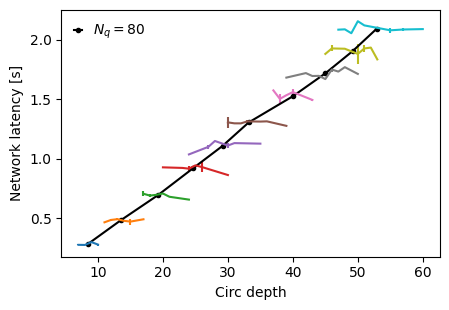

In [39]:
# y_color = np.linspace(0,1,len(num_qubits_list))
# colors_bar = plt.cm.viridis_r(y_color)

num_qubits_list = [len(compute_q_list)]

plt.figure(figsize=(4.6,3.2))
for i_n, num_qubits in enumerate(num_qubits_list):

    num_g_list = latency_depth_list[:,0].tolist()
    depth_list = latency_depth_list[:,1].tolist()
    latency_list = latency_depth_list[:,2].tolist()

    if len(depth_list)>0:
        latency_avg_list = []
        depth_avg_list = []
        for num_gates in num_gates_list:
            num_gates = int(num_gates) + 0.0
            idx_g = np.argwhere(np.array(num_g_list)==num_gates)[:,0]
            depth_list_g = np.array(depth_list)[idx_g]
            latency_list_g = np.array(latency_list)[idx_g]      
            depth_vals_g = sorted(list(set(depth_list_g.tolist())))
            latency_avg_g = np.zeros(len(depth_vals_g))
            latency_std_g = np.zeros(len(depth_vals_g))
            for i_c, circ_depth in enumerate(depth_vals_g):
                idx = np.argwhere(depth_list_g==circ_depth)[:,0]
                latency_avg_g[i_c] =  latency_list_g[idx].mean()
                latency_std_g[i_c] =  latency_list_g[idx].std()/np.sqrt(idx.shape[0]-1)
        # # plt.plot(depth_vals, latency_avg, color= colors_bar[i_n,:],label=rf"$N_q=${num_qubits}")
            plt.errorbar(depth_vals_g, latency_avg_g,latency_std_g)#,label=rf"$N_q=${num_qubits}")
            # plt.title(rf"$N_q=${num_qubits}")
            # plt.ylim(0.2,0.5)
            # plt.xlim(5,22)
            plt.xlabel("Circ depth")
            plt.ylabel("Network latency [s]")
            plt.tight_layout()
            latency_avg_list.append(latency_list_g.mean())
            depth_avg_list.append(depth_list_g.mean())
        # plt.plot(depth_avg_list, latency_avg_list, ".-", color= colors_bar[i_n,:],label=rf"$N_q=${num_qubits}")
        plt.plot(depth_avg_list, latency_avg_list, "k.-",label=rf"$N_q=${num_qubits}")
        depth_vals = sorted(list(set(depth_list)))
        depth_list = np.array(depth_list)
        latency_list = np.array(latency_list)
        latency_avg = np.zeros(len(depth_vals))
        latency_std = np.zeros(len(depth_vals))
        for i_c, circ_depth in enumerate(depth_vals):
            idx = np.argwhere(depth_list==circ_depth)[:,0]
            latency_avg[i_c] =  latency_list[idx].mean()
            latency_std[i_c] =  latency_list[idx].std()/np.sqrt(idx.shape[0]-1)

        # plt.plot(depth_vals, latency_avg, color= colors_bar[i_n,:],label=rf"$N_q=${num_qubits}")
        # plt.errorbar(depth_vals, latency_avg,latency_std, color= "black",label=rf"$N_q=${num_qubits}")

# plt.ylim(0,22)
# plt.xlim(0,240)
plt.legend(handlelength=0.6, frameon=False)
# plt.title("new algo")
plt.show()



In [35]:
# compute_q_list = [10*num_ToR*j + i  for j in range(4) for i in range(10)]
compute_q_list = list(range(80))
# print(compute_q_list)
connections = []
for i in range(num_qubits):
    for j in range(i+1,num_qubits):
        if np.random.rand() > 0.5:
            connections.append((node_qubit_list[compute_q_list[i]],node_qubit_list[compute_q_list[j]]))
        else:
            connections.append((node_qubit_list[compute_q_list[j]],node_qubit_list[compute_q_list[i]]))

num_gates_list = np.linspace(num_qubits,8*num_qubits,10)
# num_gates = 4 * num_qubits
latency_depth_list2 = []
for num_gates in num_gates_list:
    num_gates = int(num_gates)
    print(num_gates)
    tic = time.time()
    latency_depth = []
    for _ in range(Nrep):

        gate_seq = random.choices(connections, k=num_gates)
        switch_seq, circ_depth = eff_network_latency_dag_multiqubit_hybrid(G, vertex_list, gate_seq)
        switch_seq = np.array(switch_seq)

        tel_latency = 1/telecom_gen_rate * time_spdc(switch_seq[:,1]) 
        nir_latency = qubit_reset * np.array([time_nir[k] for k in switch_seq[:,0]])
        latency_combined = np.stack((tel_latency,nir_latency), axis = 1)

        T_latency =  np.max(latency_combined, axis = 1).sum() + switch_duration * switch_seq.shape[0] 
        latency_depth_list2.append([num_gates,circ_depth, T_latency])
        
    toc = time.time()    
    print(f"elapsed time {toc-tic} sec")
latency_depth_list2 = np.array(latency_depth_list2)


80
elapsed time 0.3909904956817627 sec
142
elapsed time 0.5837054252624512 sec
204
elapsed time 0.8999874591827393 sec
266
elapsed time 1.2233474254608154 sec
328
elapsed time 1.7183334827423096 sec
391
elapsed time 2.133702278137207 sec
453
elapsed time 2.777132749557495 sec
515
elapsed time 3.423358917236328 sec
577
elapsed time 4.159504652023315 sec
640
elapsed time 4.917202472686768 sec


/tmp/ipykernel_1302775/293751828.py:27: RuntimeWarning: invalid value encountered in scalar divide
  latency_std_g[i_c] =  latency_list_g[idx].std()/np.sqrt(idx.shape[0]-1)
/tmp/ipykernel_1302775/293751828.py:48: RuntimeWarning: invalid value encountered in scalar divide
  latency_std[i_c] =  latency_list[idx].std()/np.sqrt(idx.shape[0]-1)


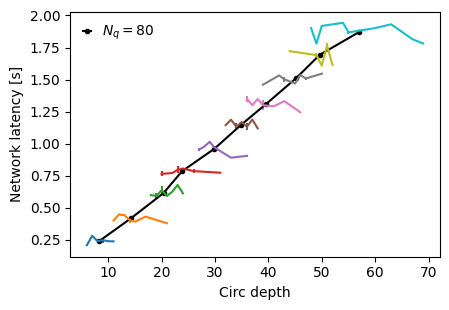

In [36]:
# y_color = np.linspace(0,1,len(num_qubits_list))
# colors_bar = plt.cm.viridis_r(y_color)

num_qubits_list = [len(compute_q_list)]

plt.figure(figsize=(4.6,3.2))
for i_n, num_qubits in enumerate(num_qubits_list):

    num_g_list = latency_depth_list2[:,0].tolist()
    depth_list = latency_depth_list2[:,1].tolist()
    latency_list = latency_depth_list2[:,2].tolist()

    if len(depth_list)>0:
        latency_avg_list = []
        depth_avg_list = []
        for num_gates in num_gates_list:
            num_gates = int(num_gates) + 0.0
            idx_g = np.argwhere(np.array(num_g_list)==num_gates)[:,0]
            depth_list_g = np.array(depth_list)[idx_g]
            latency_list_g = np.array(latency_list)[idx_g]      
            depth_vals_g = sorted(list(set(depth_list_g.tolist())))
            latency_avg_g = np.zeros(len(depth_vals_g))
            latency_std_g = np.zeros(len(depth_vals_g))
            for i_c, circ_depth in enumerate(depth_vals_g):
                idx = np.argwhere(depth_list_g==circ_depth)[:,0]
                latency_avg_g[i_c] =  latency_list_g[idx].mean()
                latency_std_g[i_c] =  latency_list_g[idx].std()/np.sqrt(idx.shape[0]-1)
        # # plt.plot(depth_vals, latency_avg, color= colors_bar[i_n,:],label=rf"$N_q=${num_qubits}")
            plt.errorbar(depth_vals_g, latency_avg_g,latency_std_g)#,label=rf"$N_q=${num_qubits}")
            # plt.title(rf"$N_q=${num_qubits}")
            # plt.ylim(0.2,0.5)
            # plt.xlim(5,22)
            plt.xlabel("Circ depth")
            plt.ylabel("Network latency [s]")
            plt.tight_layout()
            latency_avg_list.append(latency_list_g.mean())
            depth_avg_list.append(depth_list_g.mean())
        # plt.plot(depth_avg_list, latency_avg_list, ".-", color= colors_bar[i_n,:],label=rf"$N_q=${num_qubits}")
        plt.plot(depth_avg_list, latency_avg_list, "k.-",label=rf"$N_q=${num_qubits}")
        depth_vals = sorted(list(set(depth_list)))
        depth_list = np.array(depth_list)
        latency_list = np.array(latency_list)
        latency_avg = np.zeros(len(depth_vals))
        latency_std = np.zeros(len(depth_vals))
        for i_c, circ_depth in enumerate(depth_vals):
            idx = np.argwhere(depth_list==circ_depth)[:,0]
            latency_avg[i_c] =  latency_list[idx].mean()
            latency_std[i_c] =  latency_list[idx].std()/np.sqrt(idx.shape[0]-1)

        # plt.plot(depth_vals, latency_avg, color= colors_bar[i_n,:],label=rf"$N_q=${num_qubits}")
        # plt.errorbar(depth_vals, latency_avg,latency_std, color= "black",label=rf"$N_q=${num_qubits}")

# plt.ylim(0,22)
# plt.xlim(0,240)
plt.legend(handlelength=0.6, frameon=False)
# plt.title("new algo")
plt.show()

